## 1. Libs, path_input, data augmentation

In [1]:
import os
import albumentations # Fast image augmentation library
import pandas as pd
import cv2            # OpenCV 
import numpy as np
import torch
%matplotlib inline
from matplotlib import pyplot as plt

path_input = r'../input/petfinder-pawpularity-score/'

class Args:
    batch_size = 16
    image_size = 384
    epochs = 20 

# Image augmentation
train_aug = albumentations.Compose(
    [
        albumentations.Resize(Args.image_size,
                              Args.image_size,
                              p=1),
        albumentations.HueSaturationValue(
            hue_shift_limit=0.2,
            sat_shift_limit=0.2,
            val_shift_limit=0.2,
            p=0.5
        ),
        albumentations.RandomBrightnessContrast(
            brightness_limit=(-0.1, 0.1),
            contrast_limit=(-0.1, 0.1),
            p=0.5
        ),
        albumentations.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225],
            max_pixel_value=255.0,
            p=1.0,
        ),
    ],
    p=1.0,
)

## 2. Images

### Get image path

In [2]:
df_train = pd.read_csv(os.path.join(path_input, 'train.csv')).reset_index(drop = True)
image_paths = [os.path.join(path_input, f'train/{img}.jpg') for img in df_train["Id"].values]
image_paths[: 2]

['../input/petfinder-pawpularity-score/train/0007de18844b0dbbb5e1f607da0606e0.jpg',
 '../input/petfinder-pawpularity-score/train/0009c66b9439883ba2750fb825e1d7db.jpg']

### Show image after cv2.imread(): Not an original image

image.shape = (847, 1279, 3)


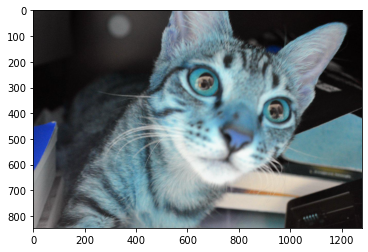

In [3]:
item = 9  # image 10
image = cv2.imread(image_paths[item]) # Eg. image.shape = (960, 720, 3): W, H and C
print(f'image.shape = {image.shape}')
plt.imshow(image)
plt.show()

### As opencv loads in BGR format by default ->  show it in RGB (the original image)

image.shape = (847, 1279, 3)


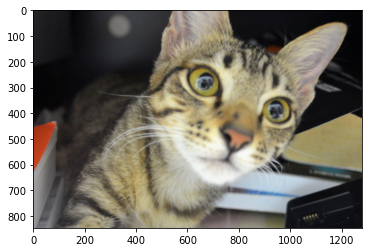

In [4]:
# as opencv loads in BGR format by default, we want to show it in RGB.
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Converts an image from one color space to another
                                               # image.shape = (960, 720, 3): C here order RGB
print(f'image.shape = {image.shape}')
plt.imshow(image)
plt.show()

### Image augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


augmented_image.shape = (384, 384, 3)


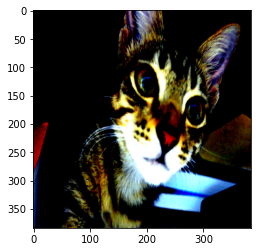

In [5]:
augmented = train_aug(image=image)
augmented_image = augmented['image']
print(f'augmented_image.shape = {augmented_image.shape}')
plt.imshow(augmented_image)
plt.show()

### Transpose np array of an image 

In [6]:
augmented_image_transpose = np.transpose(augmented_image, (2, 0, 1)).astype(np.float32) # (0, 1, 2) -> (2, 0, 1)
                                                                                        #  W, H, C   -> C, W, H 
print(f'augmented_image_transpose.shape = {augmented_image_transpose.shape}')
print(type(augmented_image_transpose))

augmented_image_transpose.shape = (3, 384, 384)
<class 'numpy.ndarray'>


### Change np array to torch tensor

In [7]:
augmented_image_transpose_tensor = torch.tensor(augmented_image_transpose, dtype=torch.float)
print(augmented_image_transpose_tensor.shape)
print(type(augmented_image_transpose_tensor))

torch.Size([3, 384, 384])
<class 'torch.Tensor'>


### Get features at df_train

In [8]:
dense_features = [
    'Subject Focus', 'Eyes', 'Face', 'Near', 'Action', 'Accessory',
    'Group', 'Collage', 'Human', 'Occlusion', 'Info', 'Blur'
]

features = df_train[dense_features].values[item]
features

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Func plot_images

In [9]:
def plot_images(df: pd.DataFrame, label: str):
    plt.figure(figsize=(20, 50))
    n_rows = min(50, df.shape[0])
    
    for i in range(n_rows):
        row = df.iloc[i]
        img_path = f"../input/petfinder-pawpularity-score/train/{row['Id']}.jpg"
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        plt.subplot(10, 5, i+1)
        plt.title(f"{label}: {row[label]}")
        plt.imshow(img)
        plt.grid(False)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    plt.close()

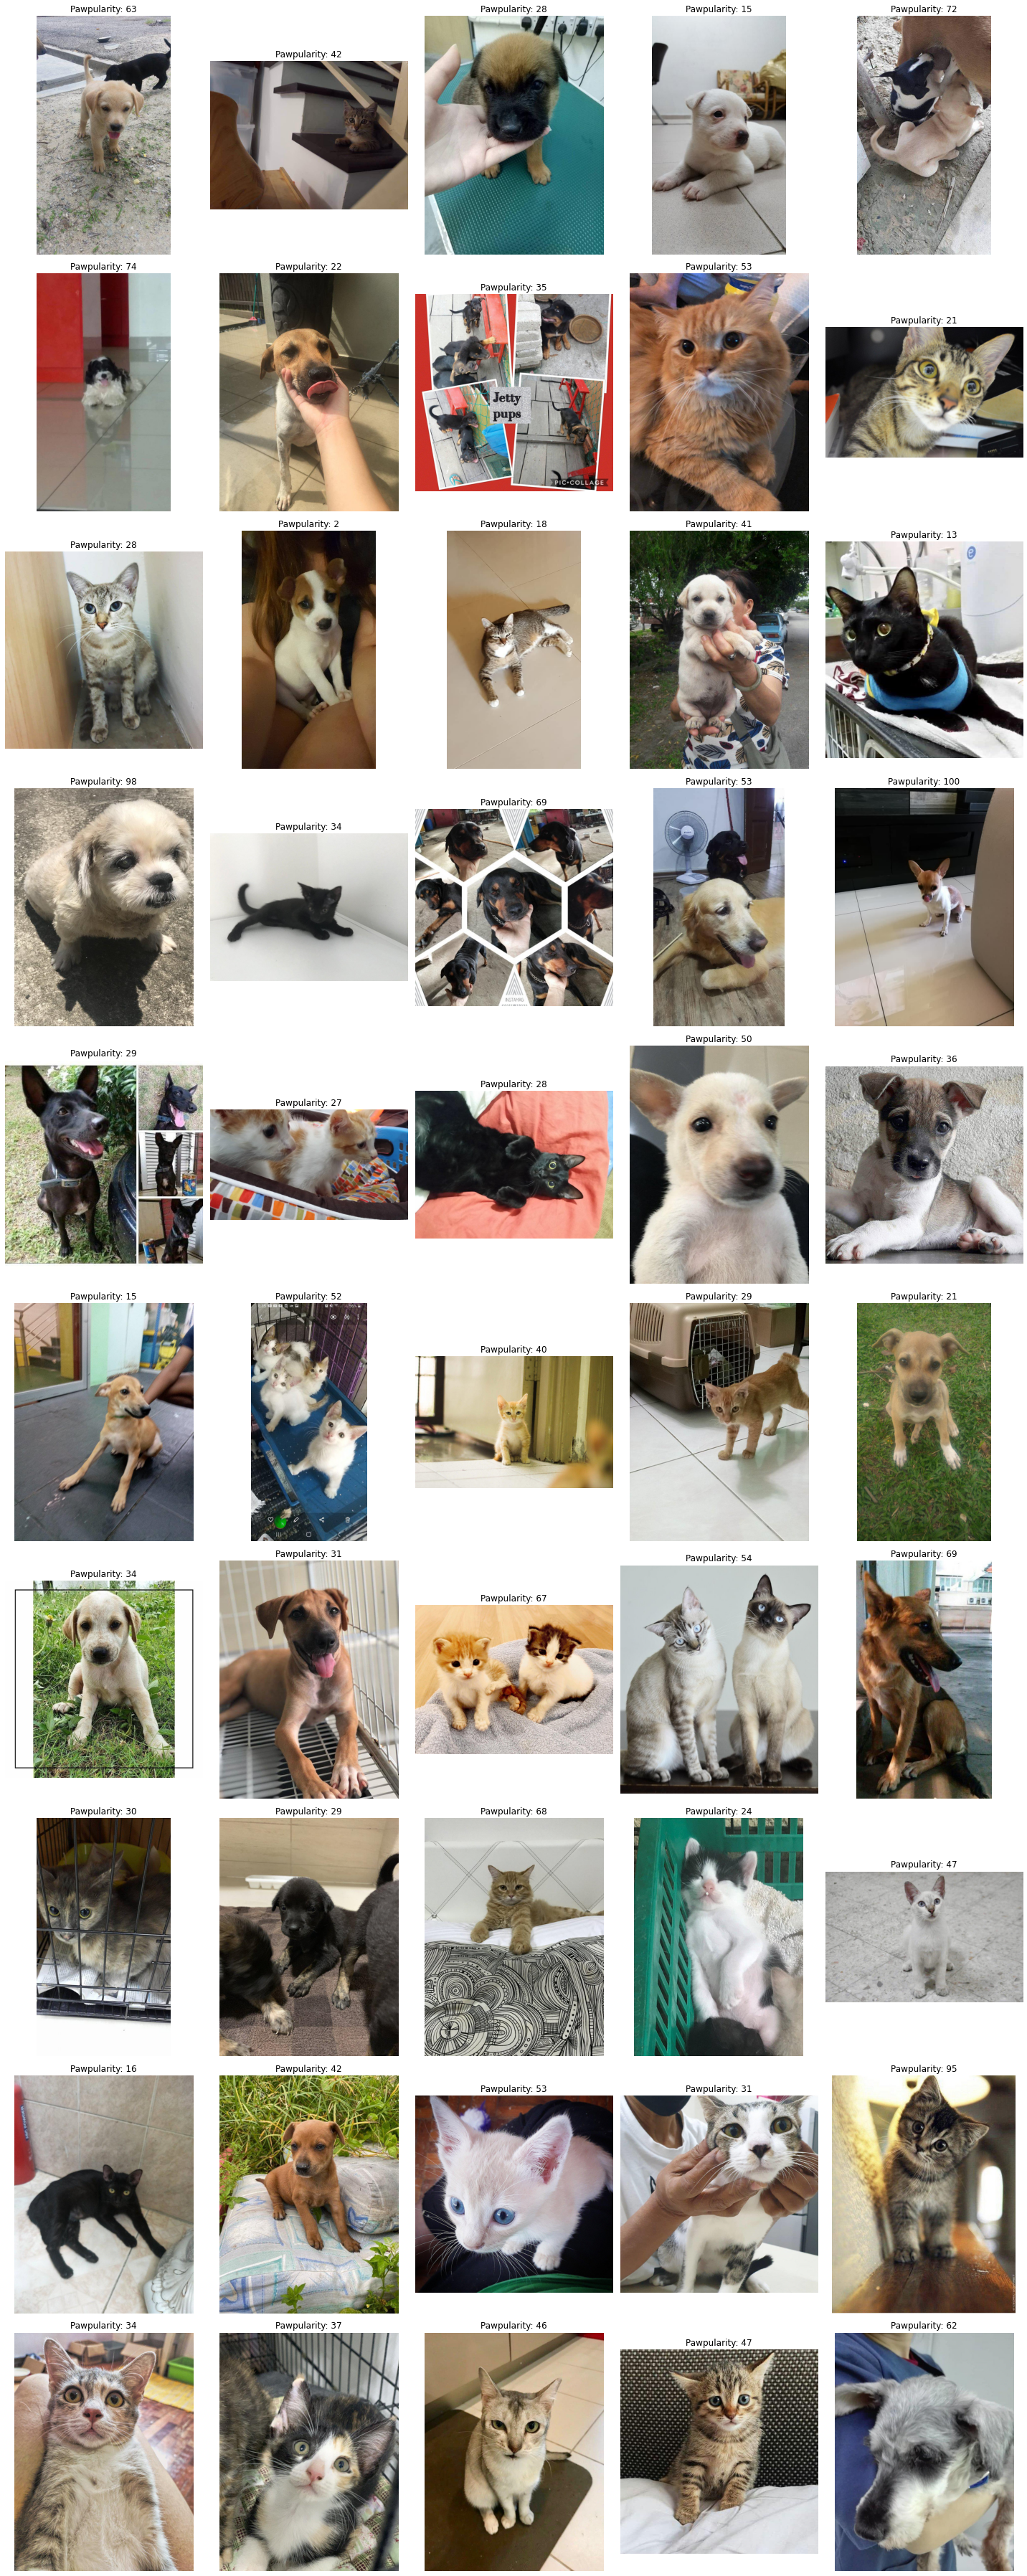

In [10]:
plot_images(df=df_train, label='Pawpularity')